In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR, LinearSVR


In [43]:
from preprocess import EstateData

dataset = EstateData("final.csv")
dataset.split_data()
dataset.preprocess(tukey=True)

Start Process!
Fill missing values: Done
Remove outlier: Done
Scale features: Done


In [44]:
train = dataset.train
test = dataset.test

In [45]:
train["Entrance"].describe()

count    31647.000000
mean        -0.213170
std          3.892394
min         -7.897342
25%          0.000000
50%          0.000000
75%          0.000000
max         90.602658
Name: Entrance, dtype: float64

In [46]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [47]:
features = train.columns.tolist()
features.remove("PricePerM2")

In [48]:
knr = KNR(n_neighbors=2, weights="distance", metric="minkowski")

In [49]:
knr.fit(train[features], train["PricePerM2"])

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [50]:
pred = knr.predict(test[features])
print(mape(test["PricePerM2"], pred))

0.7530345493995707


In [51]:
pred = knr.predict(test[features])
print(r2_score(test["PricePerM2"], pred))

0.6077728838150562


In [33]:
results = []

In [34]:
for i in range(1, 11):
    knr = KNR(n_neighbors=i, weights="distance", metric="minkowski")
    knr.fit(train[features], train["PricePerM2"])
    pred = knr.predict(test[features])
    results.append(mape(test["PricePerM2"], pred))

In [35]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'MAPE vs the number of nearest neighbors K')

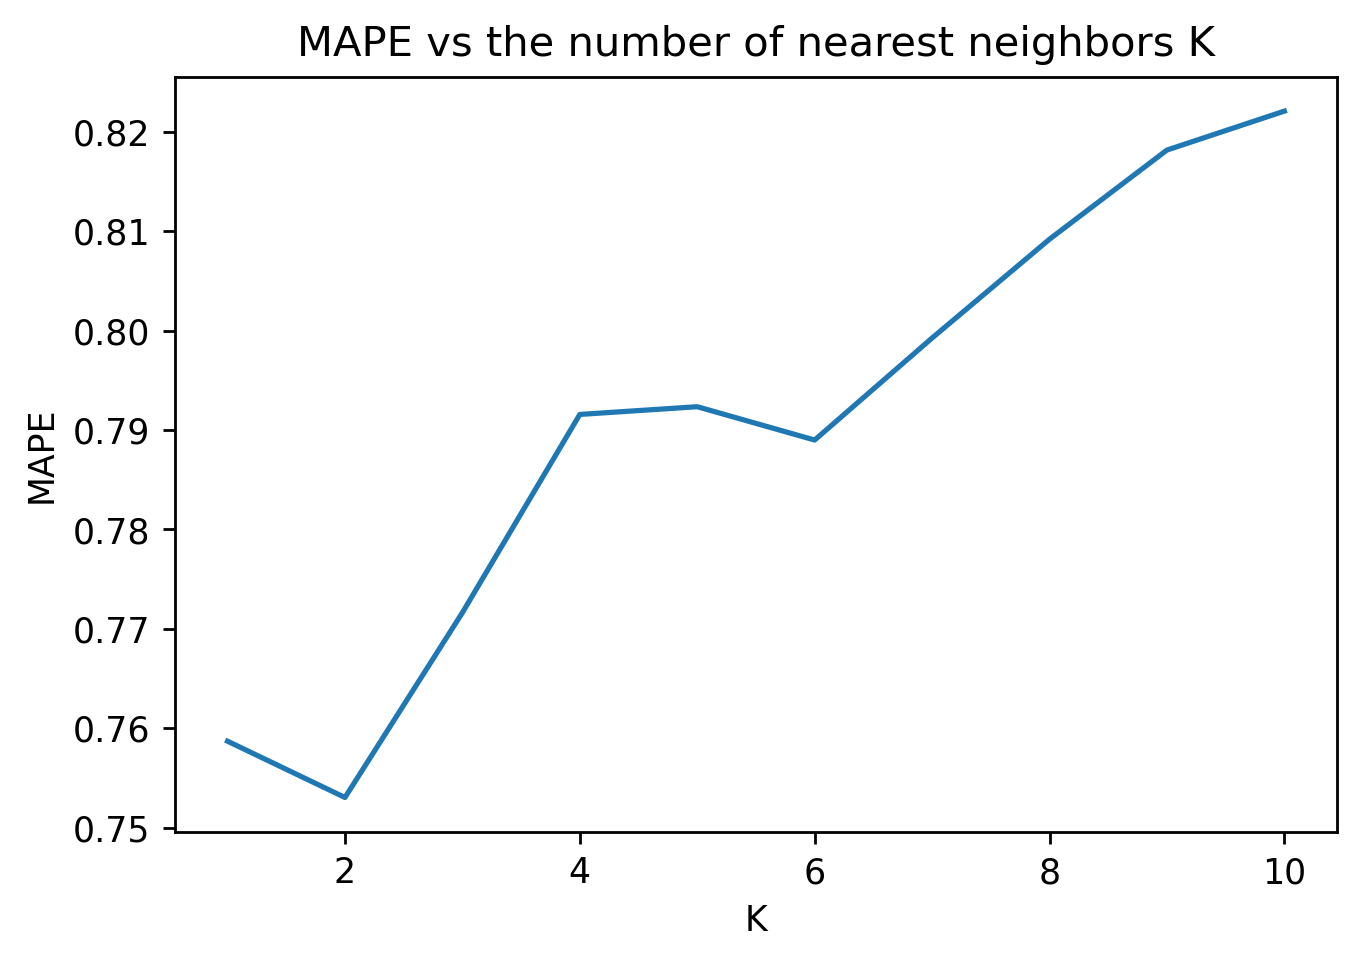

In [41]:
plt.figure(dpi=250)
plt.plot(range(1,11), results)
plt.xlabel("K")
plt.ylabel("MAPE")
plt.title("MAPE vs the number of nearest neighbors K")
